In [1]:
import xarray as xr # for data handling
import numpy as np # for maths
import matplotlib as mpl # plotlibrary
import matplotlib.pyplot as plt # for the plots 
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm # for making a log 10 colorscale
import cartopy # library for making maps
from cartopy import crs as ccrs # Projection Library
from cartopy.crs import Stereographic, PlateCarree, Mollweide # Map projections I use00
from cartopy.feature import LAND, COASTLINE # Vectordata of the Coastline and land for making the maps prettier
import cmocean
from glob import glob
import dask
from scipy.io import loadmat
import gsw

# Exercise 2

## Read Files

In [3]:
altimeter = xr.open_dataset("Altimeter_Lab_sea.nc")
altimeter

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 1826, latitude: 73, longitude: 161)
Coordinates:
  * time       (time) datetime64[ns] 15kB 2018-01-01 2018-01-02 ... 2022-12-31
  * latitude   (latitude) float32 292B 47.88 48.12 48.38 ... 65.38 65.62 65.88
  * longitude  (longitude) float32 644B -60.12 -59.88 -59.62 ... -20.38 -20.12
Data variables:
    adt        (time, latitude, longitude) float64 172MB ...
    ugos       (time, latitude, longitude) float64 172MB ...
    vgos       (time, latitude, longitude) float64 172MB ...
    crs        int32 4B ...
    sla        (time, latitude, longitude) float64 172MB ...
    flag_ice   (time, latitude, longitude) float64 172MB ...
    err_sla    (time, latitude, longitude) float64 172MB ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        http://climate.copernicus...
    creator_email:                                  http://climate.copernicus...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2023-06-07T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2023-06-06T12:00:00Z
    title:                                          DT merged two satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

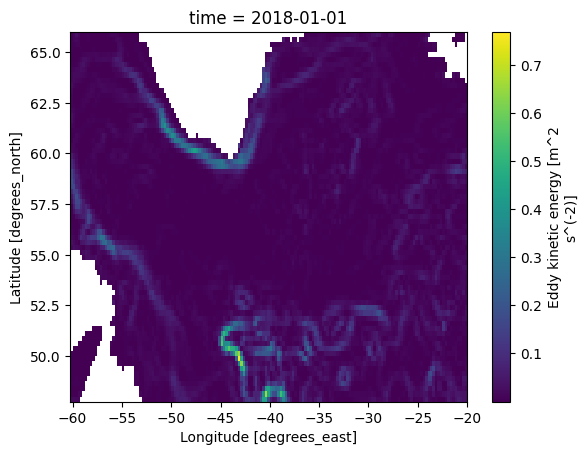

In [ ]:
altimeter["eke"] = 0.5*(altimeter.ugos**2 + altimeter.vgos**2).assign_attrs(dict(long_name="Eddy kinetic energy", standard_name="eddy_kinetic_energy", units="m^2 s^(-2)"))

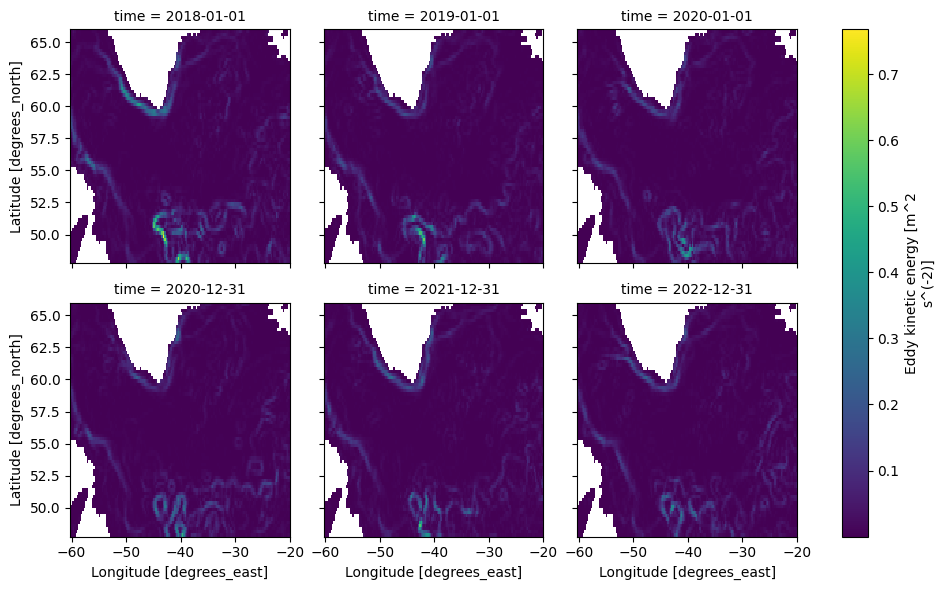

In [16]:
altimeter.eke.isel(time=slice(0,1826,365)).plot(col="time", col_wrap=3)

/home/juli/Dokumente/Uni/1_Thermohaline_Circuation/Thermohaline-Circulation/.venv/lib/python3.12/site-packages/xarray/core/nputils.py:242: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


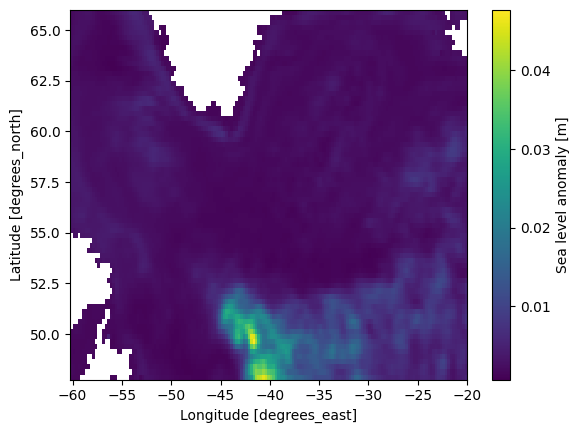

In [5]:
altimeter["sla_var"] = altimeter.sla.var(dim="time")
altimeter.sla_var.plot()

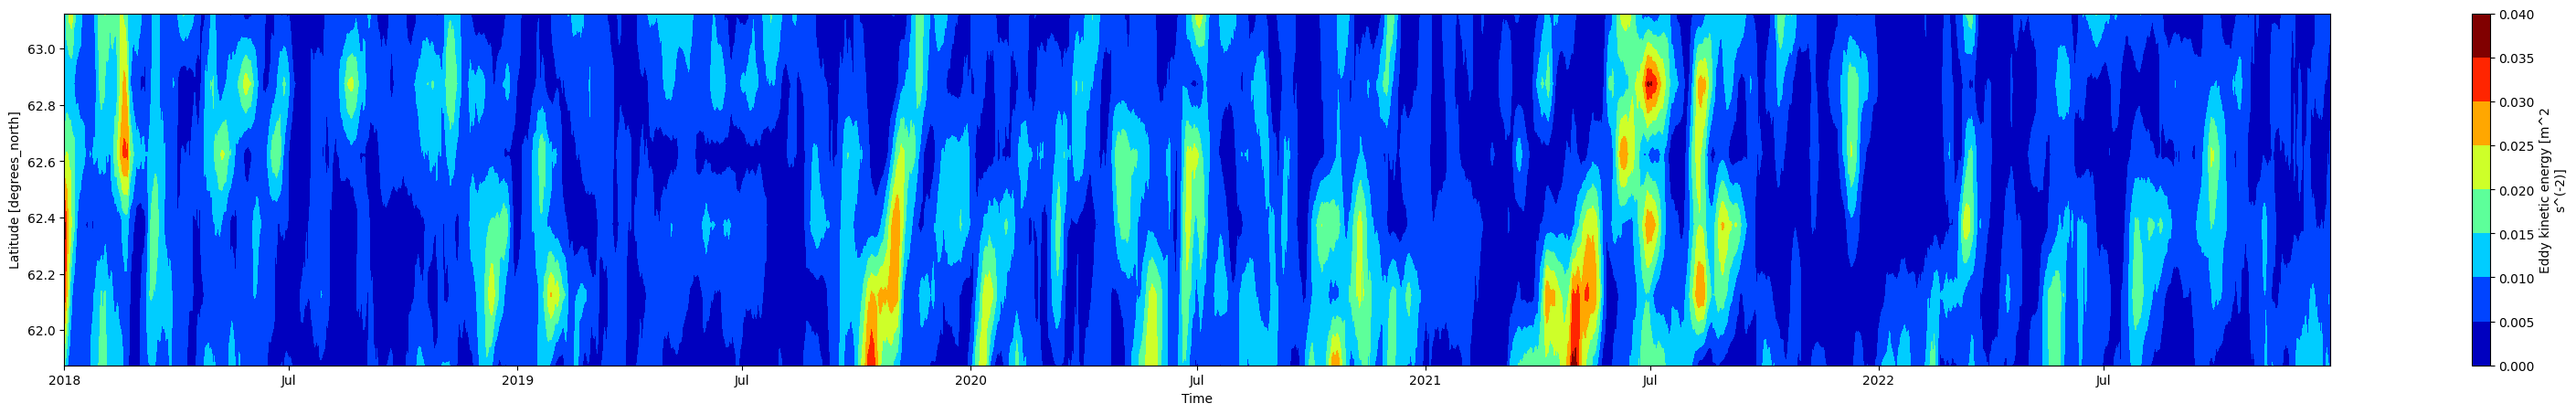

In [6]:
altimeter.eke.isel(latitude=slice(56,62), longitude=slice(-54,-48)).mean("longitude").plot.contourf(x="time", cmap="jet", size=5, aspect=8)